In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

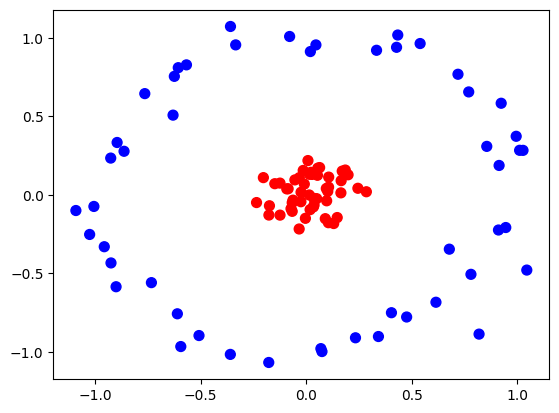

In [33]:
from sklearn.datasets import make_circles
X,y = make_circles(100,factor=.1, noise=.1)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='bwr')

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train.ravel())
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6

In [37]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

/tmp/ipython-input-3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


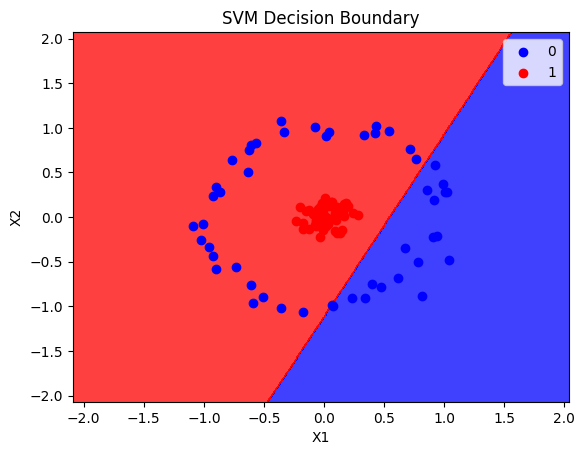

In [38]:
plot_decision_boundary(X, y, classifier)

In [39]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

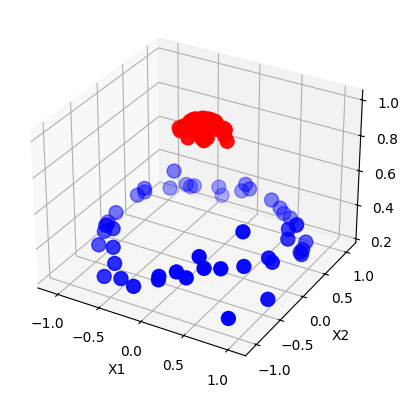

In [40]:
plot_3d_plot(X,y)

In [41]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

1.0

/tmp/ipython-input-3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


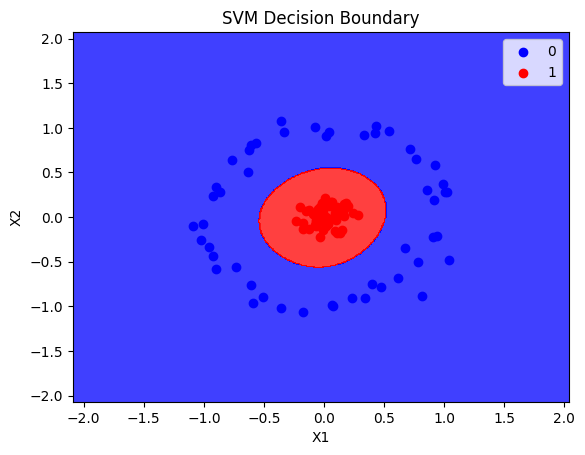

In [43]:
plot_decision_boundary(X, y, rbf_classifier)

In [49]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

1.0

/tmp/ipython-input-3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


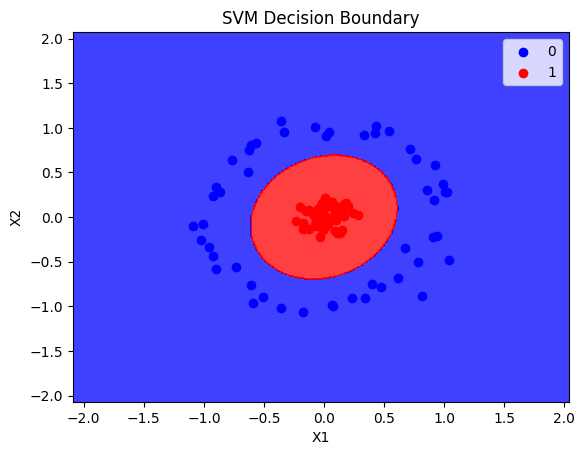

In [51]:
plot_decision_boundary(X, y, poly_classifier)

In [52]:
X

array([[-8.95204594e-01,  3.33772463e-01],
       [-7.85016489e-02,  1.00916694e+00],
       [ 9.13156714e-01,  1.87474955e-01],
       [ 5.49193138e-02,  1.70263887e-01],
       [ 1.98131713e-01,  1.27862577e-01],
       [-9.03692768e-03,  6.88198286e-02],
       [ 1.06456152e-01,  1.13254907e-01],
       [-6.10027158e-01, -7.57670883e-01],
       [ 7.46293104e-02, -9.98203776e-01],
       [-9.00117034e-01, -5.85316855e-01],
       [ 8.54764341e-01,  3.08982326e-01],
       [ 1.96482918e-02,  9.13091937e-01],
       [-1.00509177e+00, -7.37217073e-02],
       [ 1.04428318e+00, -4.79092555e-01],
       [-9.20280569e-02,  3.81770872e-02],
       [-5.93725463e-01, -9.66389380e-01],
       [-1.02522868e+00, -2.52177777e-01],
       [ 6.35160519e-02,  1.74032273e-01],
       [-3.58540188e-01,  1.07290454e+00],
       [ 1.54437640e-02,  1.31124545e-01],
       [-6.05702800e-01,  8.10366777e-01],
       [-3.83334009e-03, -1.49410384e-01],
       [ 9.51098442e-02,  4.04892597e-02],
       [ 9.

In [53]:
np.exp(-(X**2)).sum(1)

array([1.34328148, 1.35502232, 1.39983509, 1.96841479, 1.94528844,
       1.99519337, 1.9759863 , 1.25249362, 1.36364816, 1.15468945,
       1.39055486, 1.43403688, 1.35872255, 1.13094661, 1.99011017,
       1.09593623, 1.28794144, 1.96614067, 1.19564968, 1.98271484,
       1.21145835, 1.97790917, 1.98935687, 1.24225251, 1.33253339,
       1.99117012, 1.9949407 , 1.98699562, 1.98914729, 1.99823944,
       1.95043483, 1.99437547, 1.13783338, 1.34349038, 1.97910358,
       1.1423529 , 0.96713022, 1.98925504, 1.96916938, 1.22077993,
       1.20367305, 1.25419661, 1.41886235, 1.99314218, 1.95808   ,
       1.22859411, 1.98711212, 1.32303875, 1.94770011, 1.95806459,
       1.95326095, 1.38781235, 1.94013771, 1.99083725, 1.94868912,
       1.99979554, 1.39927066, 1.99297181, 1.36729687, 1.98240562,
       1.27146031, 1.23490129, 1.97307112, 1.51908228, 1.31206368,
       1.98172926, 1.29758684, 1.21731099, 1.99912243, 1.97908134,
       1.98644283, 1.99745971, 1.96485101, 1.24264249, 1.95288

In [54]:
X_new=np.exp(-(X**2))

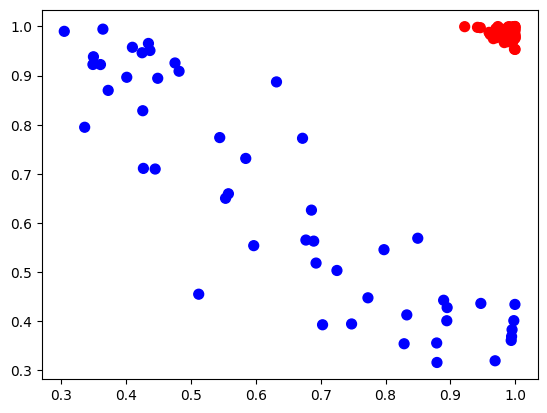

In [55]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')